## **Load Libraires**

In [1]:
import pandas as pd
from intervals import IntervalFit
from histogram import histogram
import warnings

I imported a custom Python module as the "IntervalFit" class that makes it easy for me to calculate the lower and upper interval.

In [2]:
warnings.filterwarnings("ignore")

## *Load Dataset*

In [15]:
df= pd.read_csv('C:/Users/PC/Desktop/Car-Sales/data/cars_sales.csv')

In [16]:
df.drop_duplicates(inplace=True)

## *Price*

In [17]:
IntervalFit(df.price).Lower_Interval()

Interval range STD 1.5: 1977.0
Interval range STD 2: -2954.0
Interval range STD 2.5: -7885.0
Interval range STD 3.0: -12817.0
Interval range STD 3.5: -17748.0
Interval range STD 4: -22679.0


In [18]:
df = df.query("price > 2000")

In [19]:
df.price.agg(["min","max"])

min      2050
max    159999
Name: price, dtype: int64

### *Mileage*

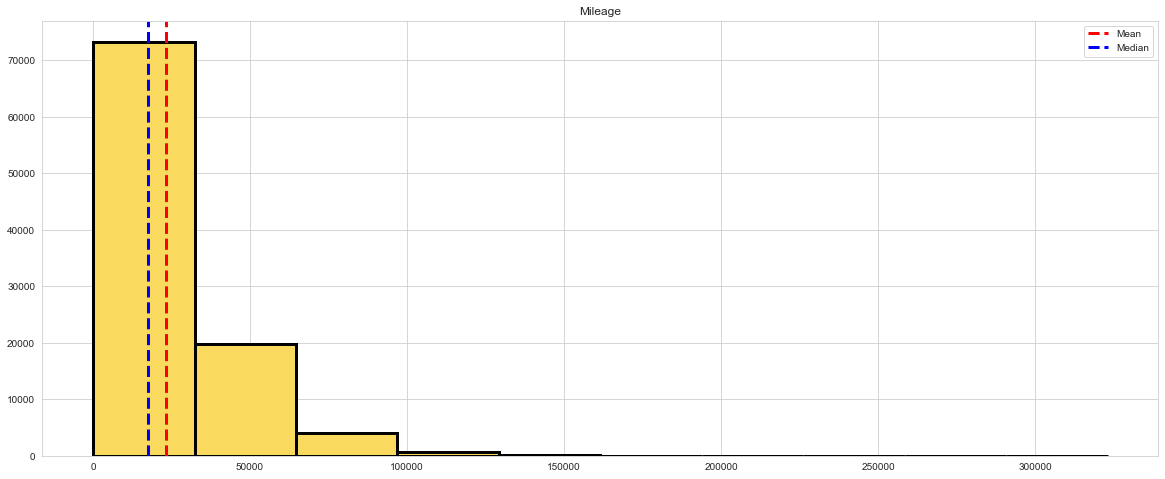

In [20]:
_ = histogram(df.mileage,"Mileage")

In [21]:
IntervalFit(df.mileage).Upper_Interval()

Interval range STD 1.5: 54128.0
Interval range STD 2: 64479.0
Interval range STD 2.5: 74830.0
Interval range STD 3.0: 85181.0
Interval range STD 3.5: 95532.0
Interval range STD 4: 105883.0


It seems to me just the last upper interval, due to the distribution of the data.

In [22]:
df = df.query("mileage > 3000 and mileage < 100000")

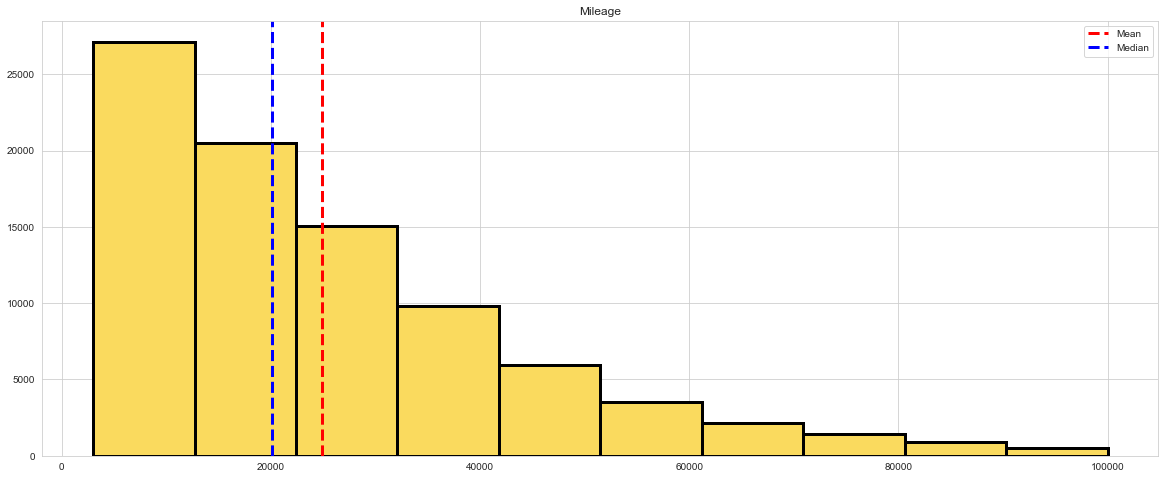

In [23]:
_ = histogram(df.mileage,"Mileage")

### *Year*

In [24]:
df.year.agg(["min","max"])

min    1970
max    2060
Name: year, dtype: int64

It is impossible that the date of manufacture belongs to the year 2060, for which I will proceed to eliminate it.

In [25]:
df = df.query("year >= 2000 and year <= 2020")

In [26]:
df.year.agg(["min","max"])

min    2000
max    2020
Name: year, dtype: int64

### *Delete Unique Values*

In [27]:
model_counts = df.model.value_counts()
model_counts = model_counts[model_counts < 10]

In [28]:
model_counts

 SQ7                8
 IQ                 8
 M6                 8
 S4                 8
 Caddy              6
 PROACE VERSO       6
 Eos                6
 Caddy Maxi         4
 Caddy Life         4
 Urban Cruiser      4
 S8                 4
 Cascada            4
 Kadjar             3
 Verso-S            3
 CLC Class          3
 S5                 3
 Ampera             3
 Veloster           3
 GLB Class          3
 Supra              2
 Tigra              2
 Z3                 2
 R Class            2
 Getz               2
 CLK                2
180                 1
 Ranger             1
 Transit Tourneo    1
230                 1
 Terracan           1
220                 1
 RS7                1
200                 1
1 Series            1
X5                  1
 Fox                1
Name: model, dtype: int64

Values that are repeated less than 10 times are better removed, as they can bias the model.

### *Delete "other" Categories*

In [29]:
df['model'] = df['model'].apply(lambda x: 'Other' if x in model_counts else x)

In [30]:
df.query("model == 'Other'").head()

,model,year,price,transmission,mileage,fuelType,engineSize,manufacturer
6640,Other,2019,28456,Automatic,9119,Diesel,2.0,Toyota
6641,Other,2019,24990,Manual,7350,Diesel,2.0,Toyota
6642,Other,2019,27990,Automatic,5633,Diesel,2.0,Toyota
6643,Other,2019,27249,Automatic,10524,Diesel,2.0,Toyota
6644,Other,2019,24450,Manual,9441,Diesel,2.0,Toyota


In [31]:
df.transmission.unique()

array(['Manual', 'Automatic', 'Semi-Auto', 'Other'], dtype=object)

In [32]:
df.fuelType.unique()

array(['Petrol', 'Other', 'Hybrid', 'Diesel', 'Electric'], dtype=object)

In [33]:
df = df.query("model != 'Other' and transmission != 'Other' and fuelType != 'Other'")

In [34]:
df.transmission.unique()

array(['Manual', 'Automatic', 'Semi-Auto'], dtype=object)

In [35]:
df.fuelType.unique()

array(['Petrol', 'Hybrid', 'Diesel', 'Electric'], dtype=object)

Eliminate those categories that are equal to "other", since it does not provide any relevant information to solve the problem.

### *Temporary DataFrame*

In [36]:
df.to_csv('C:/Users/PC/Desktop/Car-Sales/data/cars_sales2.csv',index = False)

### *Final Cleaning*

In [5]:
df= pd.read_csv('C:/Users/PC/Desktop/Car-Sales/data/cars_sales3.csv')

In [6]:
model_counts = df.model.value_counts()
model_counts = model_counts[model_counts < 10]

In [7]:
model_counts

 X7    7
A3     1
Name: model, dtype: int64

In [8]:
df['model'] = df['model'].apply(lambda x: 'Other' if x in model_counts else x)

In [9]:
df.query("model == 'Other'").head()

,model,year,price,transmission,mileage,fuelType,engineSize,manufacturer
77044,Other,2019,61875,Semi-Auto,5071,Diesel,3.0,BMW
77045,Other,2019,59988,Automatic,7791,Diesel,3.0,BMW
77046,Other,2020,63990,Semi-Auto,6137,Diesel,3.0,BMW
77047,Other,2020,69990,Semi-Auto,5087,Diesel,3.0,BMW
77048,Other,2020,64995,Semi-Auto,3452,Diesel,3.0,BMW


In [10]:
df = df.query("model != 'Other'")

In [11]:
df.query("model == 'Other'")

,model,year,price,transmission,mileage,fuelType,engineSize,manufacturer


In [12]:
enginesize_counts = df.engineSize.value_counts()
enginesize_counts = enginesize_counts[enginesize_counts < 10]

In [13]:
enginesize_counts

1.9    6
5.4    3
6.6    2
2.7    2
4.1    2
6.3    1
Name: engineSize, dtype: int64

In [14]:
df['engineSize'] = df['engineSize'].apply(lambda x: 'Other' if x in enginesize_counts else x)

In [15]:
df['engineSize'].unique()

array([1.0, 1.5, 1.6, 1.2, 2.0, 1.1, 2.3, 1.4, 5.0, 2.2, 2.5, 1.8, 1.3,
       0.0, 2.4, 3.0, 2.8, 1.7, 3.2, 'Other', 5.5, 2.1, 4.0, 2.9, 3.5,
       6.2, 4.7, 4.4, 4.2, 5.2], dtype=object)

In [16]:
df = df.query("engineSize != 'Other'")

In [17]:
df['engineSize'].unique()

array([1.0, 1.5, 1.6, 1.2, 2.0, 1.1, 2.3, 1.4, 5.0, 2.2, 2.5, 1.8, 1.3,
       0.0, 2.4, 3.0, 2.8, 1.7, 3.2, 5.5, 2.1, 4.0, 2.9, 3.5, 6.2, 4.7,
       4.4, 4.2, 5.2], dtype=object)

In [18]:
df['engineSize'] = df['engineSize'].astype(float)

In [19]:
df.engineSize.unique()

array([1. , 1.5, 1.6, 1.2, 2. , 1.1, 2.3, 1.4, 5. , 2.2, 2.5, 1.8, 1.3,
       0. , 2.4, 3. , 2.8, 1.7, 3.2, 5.5, 2.1, 4. , 2.9, 3.5, 6.2, 4.7,
       4.4, 4.2, 5.2])

## *Save Data Clear*

In [20]:
df.to_csv('C:/Users/PC/Desktop/Car-Sales/data/cars_sales_clear.csv',index = False)